In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.array([x for x in range(10)], dtype=float)

y = np.array([9, 8.2, 7.4, 6.6, 5.8, 4.9, 4.1, 3.3, 2.5, 1.8], dtype=float)

In [4]:
A = np.array([
    [len(x), sum(x)],
    [sum(x), sum(x**2)]
], dtype=float)

c = np.array([
    sum(y), sum(x*y)
])

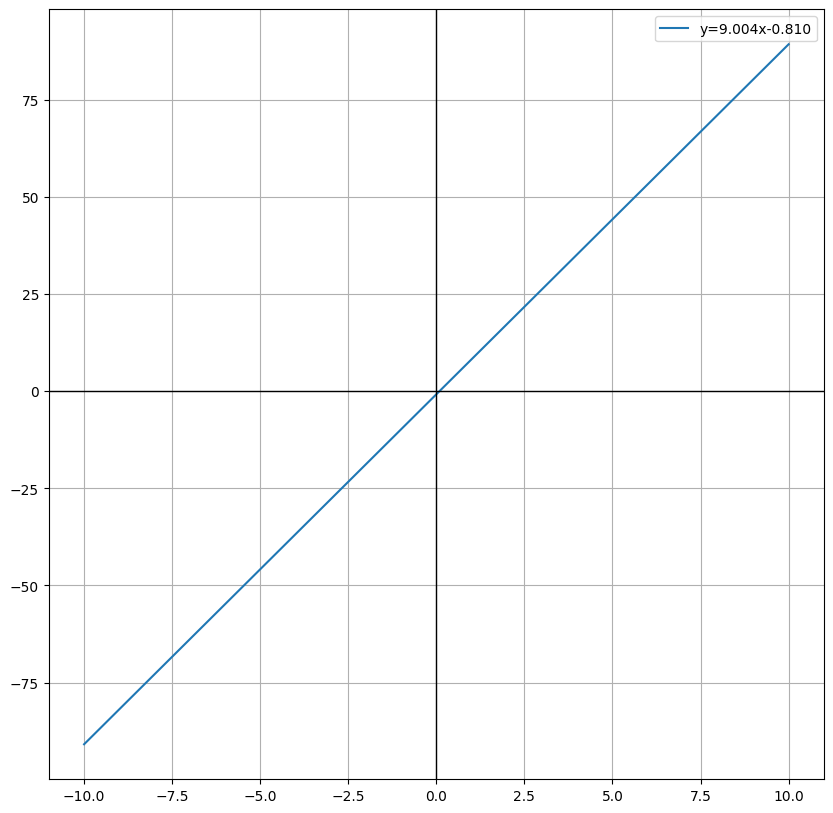

In [5]:
k, b = np.linalg.solve(A, c)

f = lambda x: k*x + b

fig, ax = plt.subplots(figsize=(10, 10))
x_range = np.linspace(-10, 10, 100)
f_range = f(x_range)
ax.plot(x_range, f_range, label=f'y={k:.3f}x{b:+.3f}')
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.axvline(0, color='black', linewidth=1, linestyle='-')
ax.grid()
ax.legend()

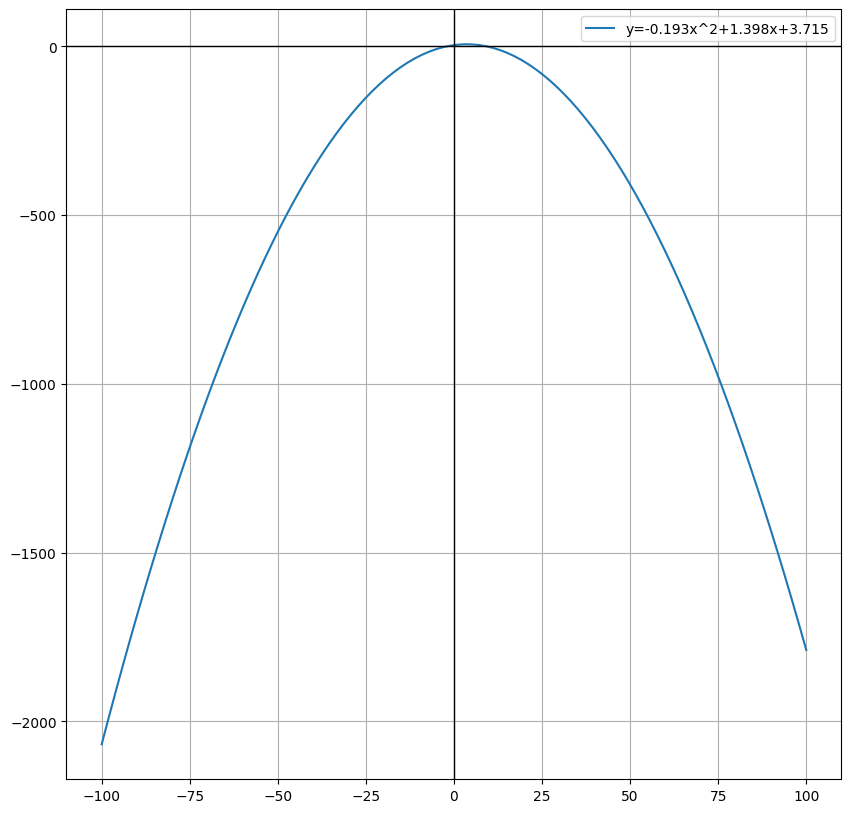

In [6]:
A = np.array([
    [sum(x**4), sum(x**3), sum(x**2)],
    [sum(x**3), sum(x**2), sum(x)],
    [sum(x**2), sum(x), len(x)]
], dtype=float)

b = np.array([
    sum(y*x**2), sum(x*y), sum(x)
], dtype=float)

a, b, c = np.linalg.solve(A, b)

f = lambda x: a*x**2 + b*x + c

fig, ax = plt.subplots(figsize=(10, 10))
x_range = np.linspace(-100, 100, 100)
f_range = f(x_range)
ax.plot(x_range, f_range, label=f'y={a:.3f}x^2{b:+.3f}x{c:+.3f}')
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.axvline(0, color='black', linewidth=1, linestyle='-')
ax.grid()
ax.legend()

In [7]:
from scipy.interpolate import lagrange

f = lagrange(x, y)
P = np.polynomial.Polynomial(f.coef[::-1])
P

Polynomial([ 9.00000000e+00, -2.32178571e+00,  3.97500992e+00, -4.05475529e+00,
        2.15307292e+00, -6.60329861e-01,  1.21145833e-01, -1.31101190e-02,
        7.71329365e-04, -1.90145503e-05], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

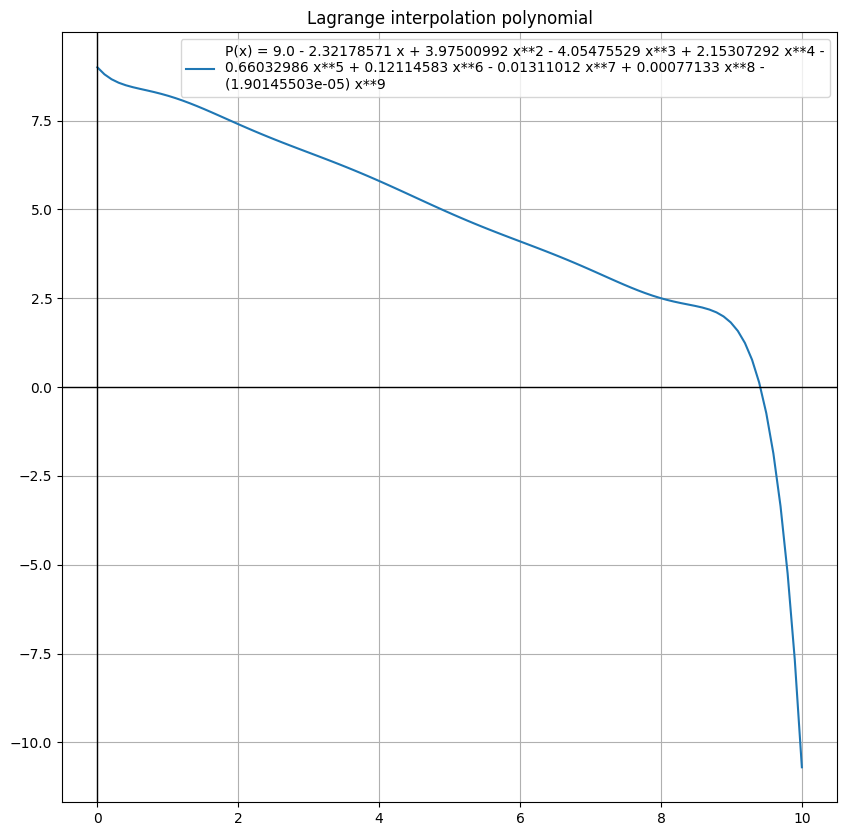

In [8]:
x_range = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 10))
plt.plot(x_range, P(x_range), label=f'P(x) = {P}')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid()
plt.title("Lagrange interpolation polynomial")
plt.legend()
plt.show()

In [9]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [15]:
a_s = divided_diff(x, y)[0, :]

P2 = np.polynomial.Polynomial(a_s)
P2

Polynomial([ 9.00000000e+00, -8.00000000e-01,  8.88178420e-16, -5.92118946e-16,
        2.59052039e-16, -8.33333333e-04,  6.94444444e-04, -2.97619048e-04,
        8.68055556e-05, -1.90145503e-05], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

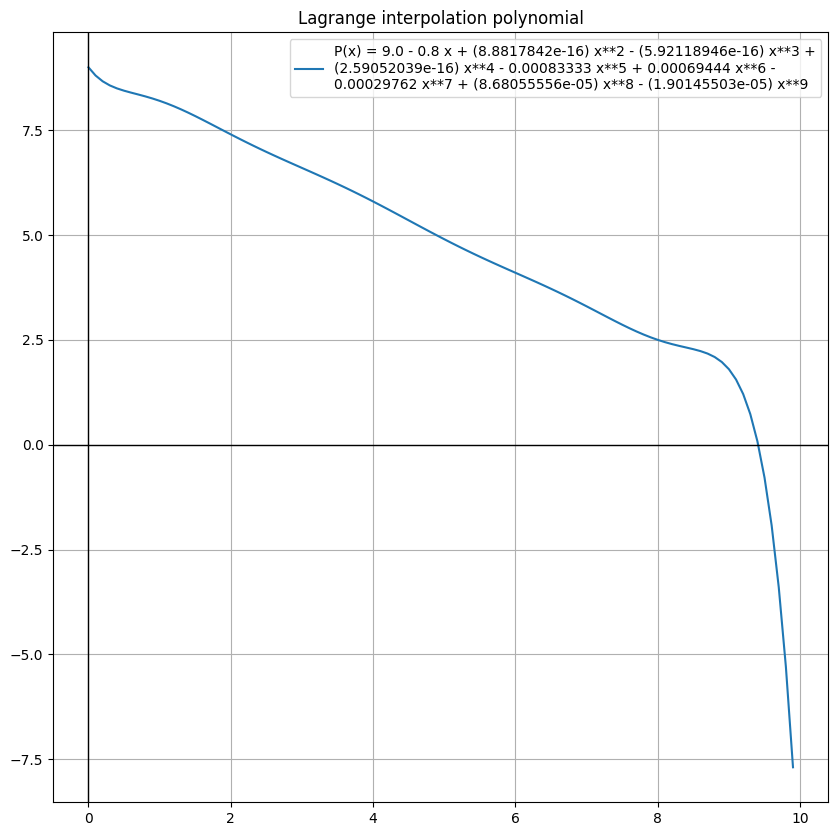

In [16]:
x_range = np.arange(0, 10, .1)
f = newton_poly(a_s, x, x_range)
plt.figure(figsize=(10, 10))
plt.plot(x_range, f, label=f'P(x) = {P2}')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid()
plt.title("Lagrange interpolation polynomial")
plt.legend()
plt.show()